<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020/blob/main/PCA_scikit_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA Example in Python with scikit-learn**

source: https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/

Principal Component Analysis (PCA) is one of the most useful techniques in Exploratory Data Analysis to understand the data, reduce dimensions of data and for unsupervised learning in general.

Let us quickly see a simple example of doing PCA analysis in Python. Here we will use scikit-learn to do PCA on a simulated data.

Let us load the basic packages needed for the PCA analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

We will simulate data using scikit-learn’s make-blobs module in sklearn.datasets. And we will use PCA implemented in scikit-learn to do the PCA analysis.

In [15]:
# load make_blobs to simulate data
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

Let us make simulated data using make_blobs. make_blobs is one of the modules available in scikit-learn to construct simulated data. make_blobs can be easily used to make data set with multiple gaussian clusters and is widely used to test clustering algorithms. Here we will use make_blobs to generate 100 x 10 matrix data, such that there are 100 samples with 10 observations. These 100 samples were generated from four different clusters. Since it is simulated, we know which cluster each sample belong to.

In [16]:
X1, Y1 = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, random_state=4,
         cluster_std=4)
print(X1.shape)

(100, 10)


Here, X1 is the 100 x 10 data and Y1 is cluster assignment for the 100 samples. Let us create a PCA model with 4 components from sklearn.decomposition.

In [17]:
pca = decomposition.PCA(n_components=10)

The simulated data is already centered and scales, so we can go ahead and fit PCA model. We will fit PCA model using fit_transform function to our data X1 and the result pc contains the principal components.

In [18]:
pc = pca.fit_transform(X1)

Let us examine the variance explained by each principal component. We can clearly see that the first two principal components explain huge part of the variation in the data. Let us also plot the variance explained by each principal component. 

PCA components:   [136.08949845 112.07143292  57.83991277  24.41987932  19.65886943
  15.17309674  12.99816704  11.30141727   9.99113195   8.81785535]


<BarContainer object of 10 artists>

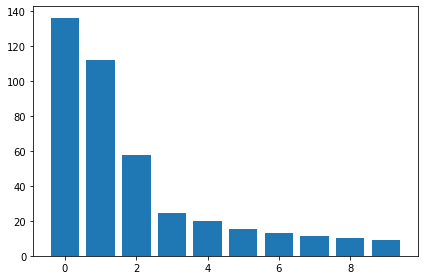

In [19]:
principal = pca.explained_variance_
print("PCA components:  ",pca.explained_variance_)

fig, ax = plt.subplots(tight_layout=True)
ax.bar( [x for x in range(principal.size)], principal)

We cannormalize this histogram and see, that first twocomponents explain ~60% of variation

PCA components:   [0.33325761 0.27444188 0.14163908 0.0597997  0.04814088 0.03715606
 0.03183007 0.02767505 0.0244664  0.02159327]


<BarContainer object of 10 artists>

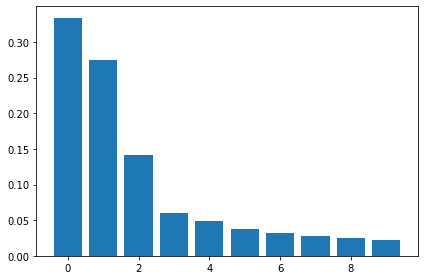

In [24]:
principal_ratio = pca.explained_variance_ratio_
print("PCA components:  ",pca.explained_variance_ratio_)

fig, ax = plt.subplots(tight_layout=True)
ax.bar( [x for x in range(principal_ratio.size )], principal_ratio)

Now we can use the top two principal components and make scatter plot. Quite good separation.

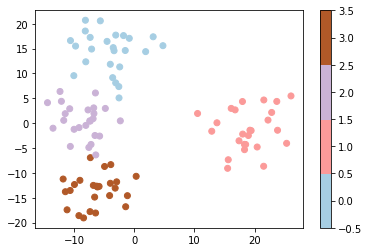

In [20]:
plt.scatter(pc[:, 0], pc[:, 1], c=Y1.astype(int), cmap=plt.get_cmap('Paired', 4), vmin=-0.5, vmax=3.5)
plt.colorbar()

As a comparison if we choose just two random variables out of 10 the separation is much worse: 

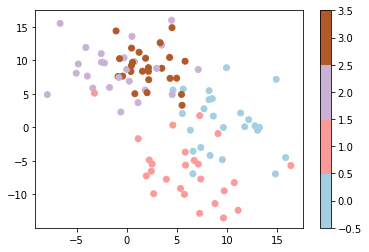

In [21]:
plt.scatter(X1[:, 0], X1[:, 1], c=Y1.astype(int), cmap=plt.get_cmap('Paired', 4), vmin=-0.5, vmax=3.5)
plt.colorbar()